In [2]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar

In [3]:
df = pd.read_csv('uber_data.csv', error_bad_lines=False)

# Print the first few rows of the dataset
print(df.head())
print(df.columns)

      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  
Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


/var/folders/8j/6fhfybcn1tx2y6r175c1ftkh0000gn/T/ipykernel_9948/2339461793.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('uber_data.csv', error_bad_lines=False)


In [4]:
print(df.isnull().sum())

# Drop any rows that contain missing or null values
df = df.dropna()

# Check for any duplicate rows in the dataset
print(df.duplicated().sum())

# Drop any duplicate rows
df = df.drop_duplicates()


START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64
1


We observe that the date-related columns in the dataset hold composite information, such as day, day of the week, month, and time. By breaking them down into individual components, we can obtain more detailed information to analyze.

In [5]:
# Convert the date columns to datetime format
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')

# Extract day, day of the week, month, and hour information
df['day'] = df['START_DATE*'].dt.day
df['weekday'] = df['START_DATE*'].dt.weekday
df['month'] = df['START_DATE*'].dt.month
df['hour'] = df['START_DATE*'].dt.hour
df['day_of_week'] = df['START_DATE*'].dt.dayofweek

In [6]:
print(df.head())

          START_DATE*           END_DATE* CATEGORY*           START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

             STOP*  MILES*         PURPOSE*  day  weekday  month  hour  \
0      Fort Pierce     5.1   Meal/Entertain    1        4      1    21   
2      Fort Pierce     4.8  Errand/Supplies    2        5      1    20   
3      Fort Pierce     4.7          Meeting    5        1      1    17   
4  West Palm Beach    63.7   Customer Visit    6        2      1    14   
5  West Palm Beach     4.3   Meal/Entertain    6        2      1    17   

   day_of_week  
0            4  
2            5  
3            1  
4            2  
5            2  


Next, we will use seaborn's countplot() method to visualize the distribution of the "category" column. This method will count the frequency of each unique value in the column and display it as a bar graph.

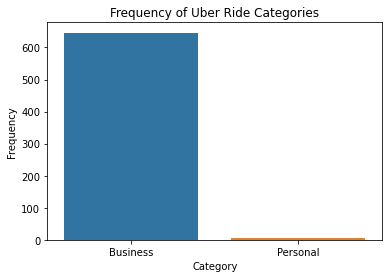

In [7]:
sns.countplot(x="CATEGORY*", data=df)
plt.title("Frequency of Uber Ride Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

Similarly we see the distributions of rides by purpose

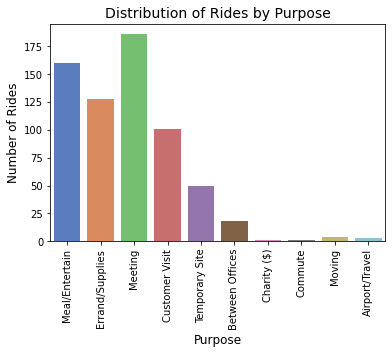

In [8]:
### plt.figure(figsize=(10,6))
sns.countplot(x="PURPOSE*", data=df, palette="muted")
plt.xticks(rotation=90)
plt.title("Distribution of Rides by Purpose", fontsize=14)
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.show()


Next, we will analyze the distribution of Uber rides taken by the user throughout the day and identify the time frames with the highest number of rides

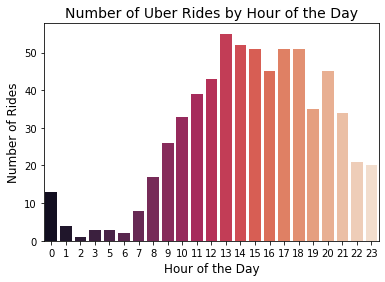

In [17]:
# Count the number of rides for each hour of the day
rides_per_hour = df.groupby('hour')['START_DATE*'].count()

# Create a bar plot of the number of rides for each hour of the day
sns.barplot(x=rides_per_hour.index, y=rides_per_hour.values, palette='rocket')

# Set the title and axis labels
plt.title('Number of Uber Rides by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Show the plot
plt.show()


From the hourly distribution of Uber rides taken by the user, we can infer that the user tends to travel more during lunch hours and early evenings compared to other parts of the day. This observation could potentially indicate that the user may have frequent client visits or client lunches during these hours.





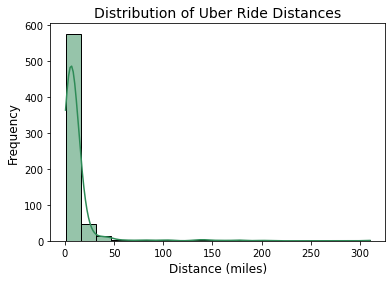

In [9]:
sns.histplot(data=df, x='MILES*', bins=20, kde=True, color='seagreen')
plt.title('Distribution of Uber Ride Distances', fontsize=14)
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


The histogram plotted for the distance column indicates that the distances traveled by the user are relatively short. This observation supports our assumption that the user's trips were primarily work-related.

At a higher level than analyzing individual days, we can observe the user's travel patterns on various days of the week.

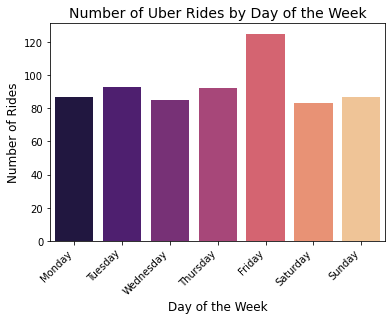

In [40]:
# Count the number of rides for each day of the week
rides_per_day = df.groupby('weekday')['START_DATE*'].count()

# Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot of the number of rides for each day of the week
sns.barplot(x=rides_per_day.index, y=rides_per_day.values, palette='magma')

# Set the tick labels to the weekday names
plt.gca().set_xticklabels(day_order)

# Set the title and axis labels
plt.title('Number of Uber Rides by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



The user travels almost every day of the week, but he takes more trips on Fridays. Since he also takes trips in the evenings, we can assume that the extra trips on Fridays may be for fun

Further, we can also look at the month-wise distribution of Uber trips.

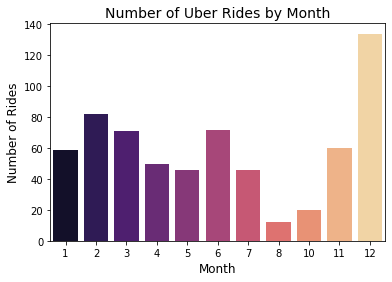

In [30]:
# Count the number of rides for each month
rides_per_month = df.groupby('month')['START_DATE*'].count()

# Create a bar plot of the number of rides for each month
sns.barplot(x=rides_per_month.index, y=rides_per_month.values, palette='magma')

# Set the title and axis labels
plt.title('Number of Uber Rides by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Show the plot
plt.show()


By analyzing the data, we observed that the user took significantly more Uber trips in December 2016 compared to the other months. This suggests that there may be some specific reason or event for the increase in rides during that month.

Let’s see on which days of December the user traveled in an Uber:

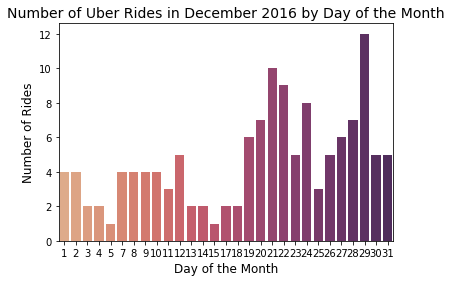

In [33]:
# Filter the data to include only the trips in December 2016
december_trips = df[(df['month'] == 12)]

# Count the number of trips for each day of the month
rides_per_day = december_trips.groupby('day')['START_DATE*'].count()

# Create a bar plot of the number of rides for each day of the month
sns.barplot(x=rides_per_day.index, y=rides_per_day.values, palette='flare')

# Set the title and axis labels
plt.title('Number of Uber Rides in December 2016 by Day of the Month', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Show the plot
plt.show()


The user's travel activity during the Christmas break was significantly higher compared to other months. It can be inferred that these trips were likely taken as part of the holiday season.

We can check the top 10 trips by Uber 

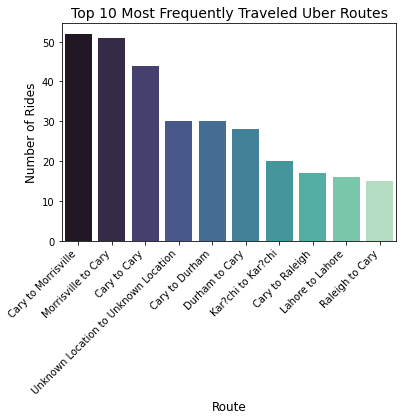

In [34]:
# Create a new column with the route information
df['route'] = df['START*'] + ' to ' + df['STOP*']

# Count the number of rides for each route
rides_per_route = df['route'].value_counts().sort_values(ascending=False)[:10]

# Create a bar plot of the top 10 routes
sns.barplot(x=rides_per_route.index, y=rides_per_route.values, palette='mako')

# Set the title and axis labels
plt.title('Top 10 Most Frequently Traveled Uber Routes', fontsize=14)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Rotate the xtick labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


We can observe that most of the places listed as frequent drop-off points are the same as the pickup points. This indicates that the user likely travels within the Cary or Morrisville region for his daily commute.

Now, let's analyze the user's Uber ride destinations to see which locations they frequently traveled to and from

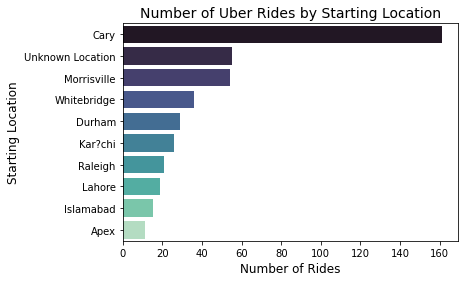

In [36]:
# Get the top 10 starting locations by ride count
start_counts = df['START*'].value_counts().head(10)

# Create a bar plot of the ride counts by starting location
sns.barplot(x=start_counts.values, y=start_counts.index, palette='mako')

# Set the title and axis labels
plt.title('Number of Uber Rides by Starting Location', fontsize=14)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Starting Location', fontsize=12)

# Show the plot
plt.show()



The fact that the majority of the trips start from Cary suggests that the user either lives or works in this area.

Similarly, let’s also look at the destination of these trips.



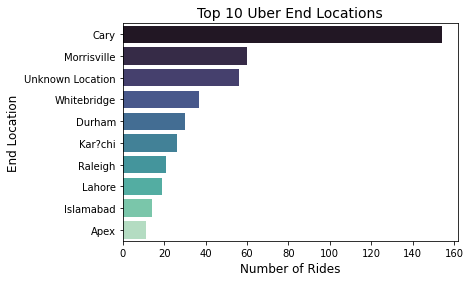

In [37]:
# Get the top 10 end locations
top_end_locations = df['STOP*'].value_counts().head(10)

# Create a bar plot of the top 10 end locations
sns.barplot(x=top_end_locations.values, y=top_end_locations.index, palette='mako')

# Set the title and axis labels
plt.title('Top 10 Uber End Locations', fontsize=14)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('End Location', fontsize=12)

# Show the plot
plt.show()


We can also plot the top 10 most common purposes for Uber Rides 

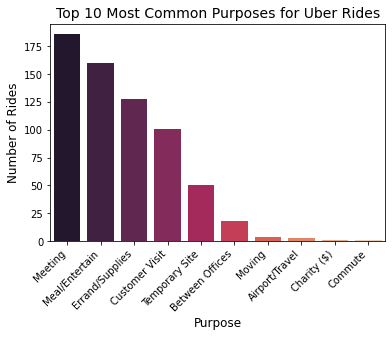

In [39]:
# Count the number of rides for each purpose
rides_per_purpose = df['PURPOSE*'].value_counts()

# Get the top 10 most common purposes
top_purposes = rides_per_purpose[:10]

# Create a bar plot of the top 10 most common purposes
sns.barplot(x=top_purposes.index, y=top_purposes.values, palette='rocket')

# Set the title and axis labels
plt.title('Top 10 Most Common Purposes for Uber Rides', fontsize=14)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Let's compare the number of rides taken on weekdays vs weekends and see if there are any differences in the user's habits or routines

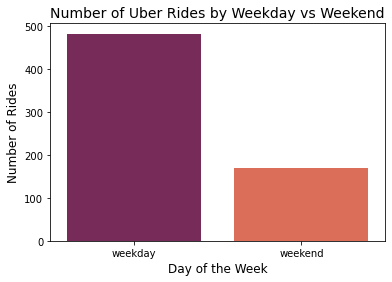

In [41]:
# Create a new column to indicate weekday vs weekend
df['weekday_or_weekend'] = np.where(df['day_of_week'] < 5, 'weekday', 'weekend')

# Count the number of rides for each group
rides_by_weekday_or_weekend = df['weekday_or_weekend'].value_counts()

# Create a bar plot of the number of rides for each group
sns.barplot(x=rides_by_weekday_or_weekend.index, y=rides_by_weekday_or_weekend.values, palette='rocket')

# Set the title and axis labels
plt.title('Number of Uber Rides by Weekday vs Weekend', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Show the plot
plt.show()


There is a noticeable difference in the number of rides taken on weekdays compared to weekends, with a higher frequency of rides on weekdays.

We can generate insights on the frequency of Uber rides by plotting a line graph to display the number of rides taken per week.

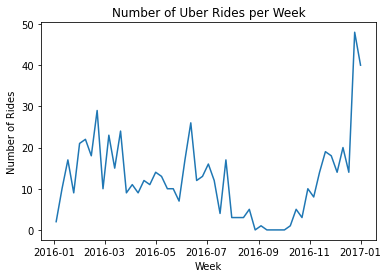

In [43]:
# Convert start date column to datetime format
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])

# Group the data by week and count the number of rides per week
rides_per_week = df.groupby(pd.Grouper(key='START_DATE*', freq='W'))['START_DATE*'].count()

# Create a line plot of the number of rides per week
plt.plot(rides_per_week.index, rides_per_week.values)

# Set the title and axis labels
plt.title('Number of Uber Rides per Week')
plt.xlabel('Week')
plt.ylabel('Number of Rides')

# Show the plot
plt.show()
